In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!nvidia-smi

Mon Jul 27 17:07:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
df=pd.read_csv("cardio_train.csv",sep=';')

In [ ]:
print(df.head(10))

   id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0  ...     1      0     0       1       0
1   1  20228       1     156    85.0  ...     1      0     0       1       1
2   2  18857       1     165    64.0  ...     1      0     0       0       1
3   3  17623       2     169    82.0  ...     1      0     0       1       1
4   4  17474       1     156    56.0  ...     1      0     0       0       0
5   8  21914       1     151    67.0  ...     2      0     0       0       0
6   9  22113       1     157    93.0  ...     1      0     0       1       0
7  12  22584       2     178    95.0  ...     3      0     0       1       1
8  13  17668       1     158    71.0  ...     1      0     0       1       0
9  14  19834       1     164    68.0  ...     1      0     0       0       0

[10 rows x 13 columns]


In [ ]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
filt = (df['ap_hi']<50) | (df['ap_hi']>300)
df['ap_hi'].replace(df[filt]['ap_hi'].values,df['ap_hi'].median(),inplace=True)

In [ ]:
filt = (df['ap_lo']<20) | (df['ap_lo']>250)
df['ap_lo'].replace(df[filt]['ap_lo'].values,df['ap_lo'].median(),inplace=True)

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,126.979014,81.376114,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,17.073363,9.598049,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,60.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#df.drop(df[(df['ap_hi'] >250) | (df['ap_lo'] > 200) |(df['ap_hi'] <50) | (df['ap_lo'] <20)].index,inplace=True)

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df['bmi']=df['weight']/(df['height']/100)**2

In [ ]:
df['age']=df['age']/365

In [ ]:
print(df.columns)


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')


In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68795.000000,68795.000000,68795.000000,68795.000000,68795.000000,68795.000000,68795.000000,68795.000000,68795.000000,68795.000000,68795.000000,68795.000000,68795.000000
mean,53.327004,1.348732,164.362236,74.122036,126.614347,81.365070,1.364678,1.225976,0.087986,0.053623,0.803387,0.494920,27.522489
std,6.761724,0.476572,8.184627,14.330620,16.763961,9.726854,0.678937,0.571932,0.283277,0.225274,0.397440,0.499978,6.049899
min,29.583562,1.000000,55.000000,11.000000,60.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.375342,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.975342,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.421918,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,64.967123,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [ ]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
5,60.038356,1,151,67.0,120,80,2,2,0,0,0,0,29.384676
6,60.583562,1,157,93.0,130,80,3,1,0,0,1,0,37.729725
7,61.873973,2,178,95.0,130,90,3,3,0,0,1,1,29.983588
8,48.405479,1,158,71.0,110,70,1,1,0,0,1,0,28.440955
9,54.339726,1,164,68.0,110,60,1,1,0,0,0,0,25.282570


In [ ]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
df=standartization(df)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,-0.436058,2,0.443449,-0.847867,-0.994474,-0.143374,1,1,0,0,1,0,21.967120
1,0.307684,1,-1.018161,0.749826,0.762649,0.898504,3,1,0,0,1,1,34.927679
2,-0.247995,1,0.078046,-0.708937,0.176941,-1.185253,3,1,0,0,0,1,23.507805
3,-0.748147,2,0.565250,0.541431,1.348357,1.940382,1,1,0,0,1,1,28.710479
4,-0.808538,1,-1.018161,-1.264657,-1.580182,-2.227131,1,1,0,0,0,0,23.011177


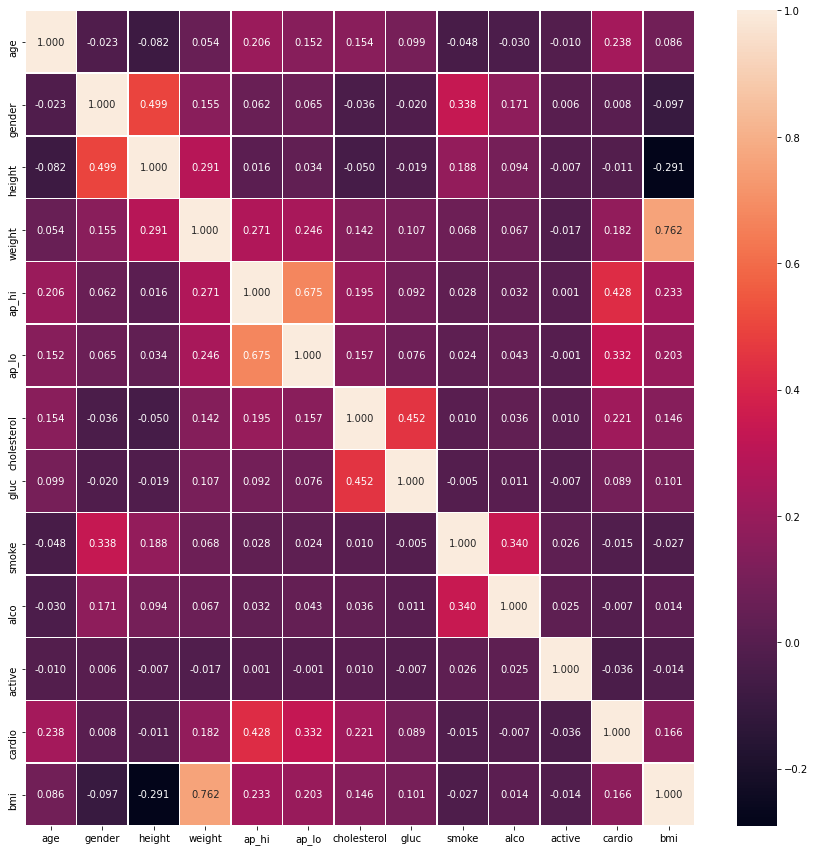

In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [ ]:
print(df.head())

        age  gender    height    weight  ...  alco  active  cardio        bmi
0 -0.434094       2  0.444463 -0.845884  ...     0       1       0  21.967120
1  0.309414       1 -1.021700  0.759071  ...     0       1       1  34.927679
2 -0.246090       1  0.077922 -0.706322  ...     0       0       1  23.507805
3 -0.746084       2  0.566643  0.549729  ...     0       1       1  28.710479
4 -0.806456       1 -1.021700 -1.264568  ...     0       0       0  23.011177

[5 rows x 13 columns]


In [ ]:
x=df.drop('cardio',axis=1)
y=df['cardio']


In [ ]:
print(x.shape,y.shape)

(70000, 12) (70000,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=123,shuffle=True)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(59500, 12) (59500,) (10500, 12) (10500,)


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Nadam



Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=12, activation='softsign'))
model.add(Dense(10, activation='softsign'))
model.add(Dense(5, activation='softsign'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 25)                325       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 646
Trainable params: 646
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_path = "../cp.ckpt"

In [ ]:
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5)

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
59500/59500 [==============================] - 18s 297us/step - loss: 0.5560 - accuracy: 0.7230
Epoch 2/50
59500/59500 [==============================] - 18s 299us/step - loss: 0.5474 - accuracy: 0.7295
Epoch 3/50
59500/59500 [==============================] - 17s 292us/step - loss: 0.5464 - accuracy: 0.7303
Epoch 4/50
59500/59500 [==============================] - 17s 290us/step - loss: 0.5454 - accuracy: 0.7317
Epoch 5/50
59500/59500 [==============================] - 17s 292us/step - loss: 0.5451 - accuracy: 0.7312
Epoch 6/50
59500/59500 [==============================] - 17s 291us/step - loss: 0.5450 - accuracy: 0.7309
Epoch 7/50
59500/59500 [==============================] - 17s 292us/step - loss: 0.5444 - accuracy: 0.7330
Epoch 8/50
59500/59500 [==============================] - 17s 292us/step - loss: 0.5441 - accuracy: 0.7323
Epoch 9/50
59500/59500 [==============================] - 17s 292us/step - loss: 0.5434 - accuracy: 0.7318
Epoch 10/50
59500/59500 [============

In [ ]:

model.evaluate(x_test, y_test, verbose=2)

[0.5419787744794573, 0.7361904978752136]

In [ ]:
!nvidia-smi

Mon Jul 27 17:28:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    73W / 149W |    155MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

In [ ]:
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
saved_model/my_model


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_6 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 992
Trainable params: 992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save("model3.h5")

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 766504643380429869, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3492387430665397642
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15151760350244549113
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8014629817449733632
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]